# Major project by ML11B3 batch.

Step 1) ----Import libraries-----

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 

In [2]:
###----------------------------------###

Step 2) ----Import dataset-----

In [3]:
df=pd.read_csv('C:/Users/joisp/Downloads/Information (1).csv',encoding='ISO-8859-1')

In [4]:
###----------------------------------###

Step 3) -------Explore dataset------

In [5]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [7]:
df.shape

(20050, 26)

In [8]:
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [9]:
df.count()

_unit_id                 20050
_golden                  20050
_unit_state              20050
_trusted_judgments       20050
_last_judgment_at        20000
gender                   19953
gender:confidence        20024
profile_yn               20050
profile_yn:confidence    20050
created                  20050
description              16306
fav_number               20050
gender_gold                 50
link_color               20050
name                     20050
profile_yn_gold             50
profileimage             20050
retweet_count            20050
sidebar_color            20050
text                     20050
tweet_coord                159
tweet_count              20050
tweet_created            20050
tweet_id                 20050
tweet_location           12566
user_timezone            12252
dtype: int64

In [10]:
###----------------------------------###----------------------------------------###

Step 4) -----Clean the dataset------

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20045    False
20046    False
20047    False
20048    False
20049    False
Length: 20050, dtype: bool

In [12]:
'''there are no duplicate values in the list'''

'there are no duplicate values in the list'

*In below steps the cleaning is done based on the problem statement

In [13]:
''' The column 'gender_gold' is not necessary and contains many null values so it should be removed'''

" The column 'gender_gold' is not necessary and contains many null values so it should be removed"

In [14]:
df=df.drop(columns=['gender_gold'])

In [15]:
''' similarly the columns 'user_timezone','tweet_location','tweet_coord' ,'profile_yn_gold' is not
    necessary and contains many null values so it should be removed  
    '''
df=df.drop(columns=['user_timezone','tweet_location','tweet_coord','profile_yn_gold'])

In [16]:
df.count()

_unit_id                 20050
_golden                  20050
_unit_state              20050
_trusted_judgments       20050
_last_judgment_at        20000
gender                   19953
gender:confidence        20024
profile_yn               20050
profile_yn:confidence    20050
created                  20050
description              16306
fav_number               20050
link_color               20050
name                     20050
profileimage             20050
retweet_count            20050
sidebar_color            20050
text                     20050
tweet_count              20050
tweet_created            20050
tweet_id                 20050
dtype: int64

In [17]:
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [18]:
df.corr()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


In [19]:
'''our target variable is gender and lets check its uniqueness'''
df.gender.unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [20]:
df['profile_yn'].value_counts()  #Counts each value in a column

yes    19953
no        97
Name: profile_yn, dtype: int64

In [21]:
df[(df['profile_yn'] == "yes") & (df['_unit_state'] == "finalized")]['_unit_id'].count() 
#Count each value through a condition 

19903

In [22]:
#Counts each value in a column
df['profile_yn:confidence'].value_counts()

1.0000    19642
0.6649        6
0.6557        6
0.6671        4
0.6436        4
          ...  
0.6567        1
0.6516        1
0.6816        1
0.6506        1
0.6913        1
Name: profile_yn:confidence, Length: 267, dtype: int64

In [23]:
df[df['_last_judgment_at'].isna()].count()

_unit_id                 50
_golden                  50
_unit_state              50
_trusted_judgments       50
_last_judgment_at         0
gender                   50
gender:confidence        50
profile_yn               50
profile_yn:confidence    50
created                  50
description              44
fav_number               50
link_color               50
name                     50
profileimage             50
retweet_count            50
sidebar_color            50
text                     50
tweet_count              50
tweet_created            50
tweet_id                 50
dtype: int64

In [24]:
df = df[df['_last_judgment_at'].notna()]
#remove 20050-20000=50 rows that had NaN in this col

In [25]:
df.shape

(20000, 21)

In [26]:
# simliraly for gender

In [27]:
df[df['gender'].isna() == True].shape

(97, 21)

In [28]:
# there are 97 rows in gender with null or NAN

In [29]:
df = df[df['gender'].notna()]

In [30]:
df.shape

(19903, 21)

In [31]:
# checking other columns

In [32]:
df[df['gender:confidence'].isna() == True].shape


(0, 21)

In [33]:
df[df['created'].isna() == True].shape


(0, 21)

In [34]:
df[df['description'].isna() == True].shape

(3723, 21)

In [35]:
'''
'description' contains many null values so I will those null/NaN values with random word/sentence
for eg= 'my description is complicated' ..  :)
'''

df['description'] = df['description'].fillna("my description is complicated")

In [36]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17


In [37]:
# Conformation of null values in 'description' column

In [38]:
df[df['description'].isna() == True].shape

(0, 21)

In [39]:
# similarly conforming other columns with null values

In [40]:
df[df['name'].isna() == True].shape

(0, 21)

In [41]:
df[df['profileimage'].isna() == True].shape

(0, 21)

In [42]:
df[df['retweet_count'].isna() == True].shape

(0, 21)

In [43]:
df[df['sidebar_color'].isna() == True].shape

(0, 21)

In [44]:
df[df['sidebar_color'].isna() == True].shape

(0, 21)

In [45]:
df[df['tweet_created'].isna() == True].shape

(0, 21)

In [46]:
df[df['tweet_id'].isna() == True].shape

(0, 21)

# drawing plots for visualizing the dataset

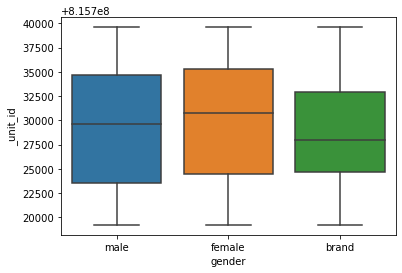

In [47]:
'''

Here the plots are based on gender with the respective columns.
in gender column there is -unknown- should be removed for better results

'''
df=df[df['gender']!='unknown']
sns.boxplot(data=df,y="_unit_id",x="gender")
plt.show()

In [48]:
'''in gender column there is -unknown- should be removed for better results'''
df=df[df['gender']!='unknown']

In [49]:
df.shape

(18786, 21)

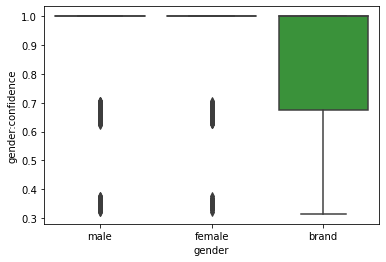

In [50]:
sns.boxplot(data=df,y="gender:confidence",x="gender")
plt.show()

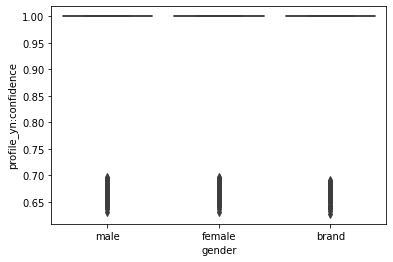

In [51]:
sns.boxplot(data=df,y="profile_yn:confidence",x="gender")
plt.show()

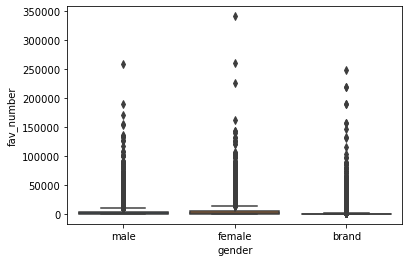

In [52]:
sns.boxplot(data=df,y="fav_number",x="gender")
plt.show()

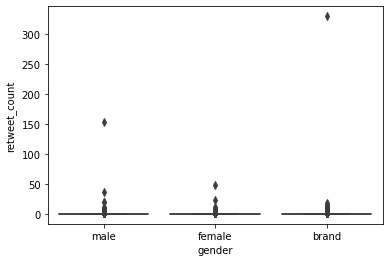

In [53]:
sns.boxplot(data=df,y="retweet_count",x="gender")
plt.show()

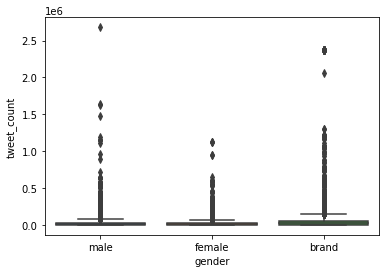

In [54]:
sns.boxplot(data=df,y="tweet_count",x="gender")
plt.show()

In [55]:
'''
In the above o/p we can see that there are 18786 rows in the dataset initially there were around 20050 rows
we will try applying machine learining algorithms.
'''
df.shape

(18786, 21)

In [56]:
'''
we will try applying ML algos and check for accuracy,
If accuracy is not increased we will remove brand from gender.

'''
df[df['gender']=='brand'].shape

(5928, 21)

step 5) --- Applying algorithms -----

1st algo------ LOGISTIC REGRESSION----

In [57]:
df.describe().columns

Index(['_unit_id', '_trusted_judgments', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count',
       'tweet_id'],
      dtype='object')

In [58]:
x=df[['_unit_id', '_trusted_judgments', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count',
       'tweet_id']].values
y=df[['gender']].values

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.75)

In [60]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((14089, 8), (4697, 8), (14089, 1), (4697, 1))

In [61]:
logReg=LogisticRegression()

In [62]:
 logReg.fit(x_train,y_train)

C:\Users\joisp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [63]:
yPred=logReg.predict(x_test)

In [64]:
accuracy_score(yPred,y_test)

0.3555460932510113

In [65]:
''' 

The accuracy is too low it means the dataset is not fully cleaned.
We will further clean the dataset and try applying algorithms

'''
print()

In [66]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,815739590,False,finalized,3,10/26/15 23:04,male,1.0000,yes,1.0,1/24/13 11:55,...,33834,ABB8C2,AntiHero94,https://pbs.twimg.com/profile_images/653014313...,1,0,Seriously love Trent and Justin. Would do anyt...,29190,10/26/15 13:18,6.587400e+17
19996,815739591,False,finalized,3,10/27/15 1:40,male,1.0000,yes,1.0,12/19/14 13:54,...,2462,0084B4,dredoo24,https://pbs.twimg.com/profile_images/633240548...,0,C0DEED,One person can look at you like your the most ...,11117,10/26/15 13:18,6.587400e+17
19997,815739592,False,finalized,3,10/27/15 0:03,female,1.0000,yes,1.0,4/15/15 19:15,...,1855,664422,6BETHANY4Victor,https://pbs.twimg.com/profile_images/657192653...,0,0,These 24 Wedding Photobombs Made The Bride And...,5640,10/26/15 13:18,6.587400e+17
19998,815739593,False,finalized,3,10/26/15 22:27,female,0.6593,yes,1.0,4/6/15 13:43,...,2160,05B8CC,SorasNerdyGeek,https://pbs.twimg.com/profile_images/656988985...,0,0,So I am riding around and I saw a horse runnin...,2041,10/26/15 13:18,6.587400e+17


In [67]:
'''
The columns with almost less requirement are been dropped and 
stored in seperate variable used for testing.

'''

'\nThe columns with almost less requirement are been dropped and \nstored in seperate variable used for testing.\n\n'

In [68]:
df_testing=df.drop(columns=['_unit_state','tweet_id','tweet_created'])

In [69]:
df_testing=df_testing[df_testing['gender']!='brand']

In [70]:
df_testing.shape

(12858, 18)

In [71]:
'''
Now we apply algorithms to newly created df_testing dataset and see the accuracy score

'''
print()

In [72]:
df_testing.describe().columns

Index(['_unit_id', '_trusted_judgments', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count'],
      dtype='object')

In [73]:
x_t=df_testing[[ '_trusted_judgments', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count'
       ]].values
y_t=df_testing[['gender']].values

In [74]:
xT_train , xT_test , yT_train , yT_test = train_test_split(x_t,y_t,train_size = 0.75)

In [75]:
 logReg.fit(xT_train,yT_train)

C:\Users\joisp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [76]:
y_tPred=logReg.predict(xT_test)

In [77]:
accuracy_score(y_tPred,yT_test)

0.5446345256609643

In [78]:
'''
We can see that the accuracy is improved from 33% to 54%.
But the accuracy of 54% is also not acceptable we have to still clean the dataset.
'''
print()

In [79]:
'''
now we will drop all unique elements in the dataset
'''
print()

In [80]:
df_testing.shape

(12858, 18)

In [81]:
'''
Still the accuracy is not increasing so further the data cannot be cleaned 
So now we will keep df_testing and test with other machine learning algorithms 
'''
df=df_testing

In [82]:
df.shape

(12858, 18)

Decision Tree algorithm

In [83]:
yT_train=yT_train.ravel()

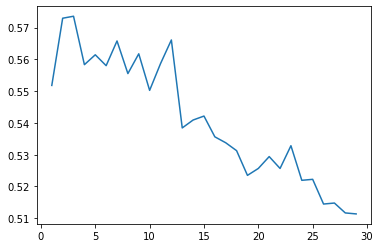

In [84]:
scores=[]
for i in range(1,30):
  tree=DecisionTreeClassifier(max_depth = i) 
  tree.fit(xT_train, yT_train) 
  scores.append(tree.score(xT_test,yT_test)) 
plt.plot(range(1,30),scores) 
plt.show()

In [85]:
tree=DecisionTreeClassifier(max_depth=5) 
tree.fit(xT_train, yT_train) 
tree.score(xT_test,yT_test)

0.5614307931570762

In [86]:
predictions = tree.predict(xT_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(yT_test,predictions)) 
print(confusion_matrix(yT_test,predictions))

              precision    recall  f1-score   support

      female       0.56      0.70      0.62      1650
        male       0.57      0.41      0.48      1565

    accuracy                           0.56      3215
   macro avg       0.56      0.56      0.55      3215
weighted avg       0.56      0.56      0.55      3215

[[1157  493]
 [ 917  648]]


KNN algorithm

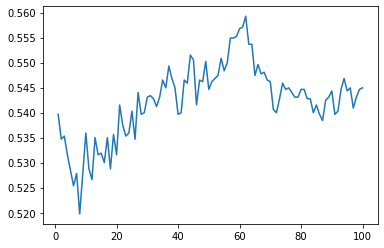

In [87]:
accuracies=[]
for k in range(1,101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(xT_train, yT_train)
  accuracies.append(classifier.score(xT_test, yT_test)) 
  
k_list=list(range(1,101)) 
plt.plot(k_list,accuracies)
plt.show() 

In [88]:
classifier = KNeighborsClassifier(n_neighbors=int(max(accuracies)*100))
classifier.fit(xT_train, yT_train)
classifier.score(xT_test, yT_test) 

0.5483670295489891

In [89]:
#------------------------------#---------------------#

step 5) Ensemble modelling

In [90]:
#'''
Simple Ensemble techniques
1. Max Voting
2. Averaging
3. Weighted Averaging

We will be using first method i.e Max voting

Max voting:
The max voting method is generally used for classification problems. 
In this technique, multiple models are used to make predictions for each data point. 
The predictions by each model are considered as a ‘vote’. 
The predictions which we get from the majority of the models are used as the final prediction.

'''
print()

In [93]:
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model3= KNeighborsClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='hard')
model.fit(xT_train,yT_train)
model.score(xT_test,yT_test)


0.5337480559875584

In [94]:
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(xT_train,yT_train)
model.score(xT_test,yT_test)

0.535303265940902

In [103]:
# The voted result is around 57% from ensembel model

In [1]:
#----------------------------#-----------------------#

step 6) Asking questions 

# Asking some questions to our dataset

What is the average numberwords used by male and female users in their description to describe themselves

In [105]:
df1=df[df['description'].notna()]

In [106]:
df2=df1[df1['gender']=='male']

In [107]:
df3=df1[df1['gender']=='female']

In [108]:
df2['frequency'] = df1['description'].str.count(' ') + 1
total_no_of_words_male=df2['frequency'].sum()
no_of_rows2=len(df2['frequency'])
avg_no_of_words_in_description_male=total_no_of_words_male/no_of_rows2
avg_no_of_words_in_description_male

<ipython-input-108-31d661dcbb02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['frequency'] = df1['description'].str.count(' ') + 1


12.492953183217237

In [109]:
df3['frequency'] = df1['description'].str.count(' ') + 1
total_no_of_words_female=df3['frequency'].sum()
no_of_rows3=len(df3['frequency'])
avg_no_of_words_in_description_female=total_no_of_words_female/no_of_rows3
avg_no_of_words_in_description_female

<ipython-input-109-9e3bffe736ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['frequency'] = df1['description'].str.count(' ') + 1


10.91338818249813

answer----

The no. of words used by male users in their description is 12

The no. of words used by female users in their description is 11

In [117]:
#-------------------------#-----------------------#

Q 2) On average what is the number of tweets done by both gendres

In [110]:
total_tweets_male=df2['tweet_count'].sum()

In [111]:
no_of_rows=len(df2['tweet_count'])

In [112]:
avg_tweets_male=total_tweets_male/no_of_rows

In [114]:
total_tweets_male

196669055

In [115]:
avg_tweets_male

31859.558561477403

In [116]:
# Total number of tweets done by male users are 196669055.
# And the average is around 31860

In [118]:
total_tweets_female=df3['tweet_count'].sum()

In [119]:
no_of_rows2=len(df3['tweet_count'])

In [122]:
avg_tweets_female=total_tweets_female/no_of_rows2

In [123]:
total_tweets_female

182651849

In [124]:
avg_tweets_female

27322.64008975318

In [129]:
# Total number of tweets done by male users are 182651849.
# And the average is around 27323

In [2]:
'''
Contributions to this project were made by : 
                                                 *) Prabhanjan Jois 
                                                 *) Siddharth Thewani
                                                 *) Atishaya Jain
                                                 *) Akshat Parashar

Some of the specific works are listed below :

        *) Prabhanjan jois :- Ml algorithms , Data visualization and Ensymbol modelling.
        *) Siddharth Thewani :- Data preprocessing.
        *) Atishaya Jain :- Ml algorithms , Questions to the dataset.
        *) Akshat parashar :- Report Preparation.



ML11B3 batch mates:

                    •	Jois Prabhanjan
                    •	Atishaya Jain
                    •	Chaitanya Apate
                    •	Shashank K S
                    •	Siddharth
                    •	Akshat Parashar
                    •	sirisha K
                    •	Sirisha Kodukula
                    •	Sai Kumar
                    •	AlekhyaNaravajhula
                    •	Sraddha Reddy
                    •	erukullasaitharun
                    •	Akash Singh
                    •	Kalyani Vidhate
                    •	Meghana Yelleti

         
         
'''
print()

In [ ]:
#------------------------------------#-----------------------------------#